# Lyft System Data exploration 
## Ahmed ElSabbagh

## Preliminary Wrangling

The data we are following today is the Lyft system data, which Lyft had offered recently to the public as of January 2020, the data has been divided into all of 2017 data, and then divided per month (january, february etc) for each year from 2017 to current 2020, most recently updated was April Data.

Lyft is bike rental company, allowing the user to rent a bike from some station, use them for transportation, and drop them in another rental station, and depending on how long it took, the money automatically paid from the credit card.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [30]:
df2019 = pd.read_csv("201904-fordgobike-tripdata.csv")
df2020 = pd.read_csv("202004-baywheels-tripdata.csv")
df2018 = pd.read_csv("201804-fordgobike-tripdata.csv")

In [32]:
df2018.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,72393,2018-04-30 22:49:32.6180,2018-05-01 18:56:06.3010,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3940,Customer,No
1,81034,2018-04-30 17:46:04.9970,2018-05-01 16:16:39.2470,122,19th St at Mission St,37.760299,-122.418892,42,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,3374,Customer,No
2,86142,2018-04-30 16:07:13.9190,2018-05-01 16:02:56.7170,41,Golden Gate Ave at Polk St,37.781270,-122.418740,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3191,Subscriber,Yes


In [31]:
df2019.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No


In [6]:
df2020.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5A1FF31692371859,electric_bike,2020-04-04 08:28:20,2020-04-04 08:33:34,NaN,NaN,NaN,NaN,37.7692,-122.4209,37.7703,-122.4069,casual
1,D8D5BA2D4F051133,electric_bike,2020-04-03 18:55:43,2020-04-03 19:21:05,NaN,NaN,NaN,NaN,37.8023,-122.4244,37.8023,-122.4244,casual
2,A3633A9140CA4FF8,electric_bike,2020-04-04 15:11:04,2020-04-04 15:12:21,NaN,NaN,NaN,NaN,37.7667,-122.3961,37.7667,-122.3962,casual


In [43]:
df2020.rideable_type.unique()

array(['electric_bike', 'docked_bike'], dtype=object)

In [33]:
df2018.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,131169.000000,131169.000000,131169.000000,131169.000000,131169.000000,131169.000000,131169.000000,131169.000000
mean,885.927369,115.930197,37.762504,-122.345369,113.923663,37.762677,-122.344650,2112.806044
std,2697.759807,95.822508,0.112139,0.130194,95.496324,0.112045,0.129584,1165.606593
min,61.000000,3.000000,37.312854,-122.444293,3.000000,37.312854,-122.444293,11.000000
25%,348.000000,34.000000,37.771058,-122.411726,30.000000,37.771058,-122.409851,1126.000000
50%,550.000000,86.000000,37.781123,-122.397086,81.000000,37.781270,-122.395936,2183.000000
75%,862.000000,182.000000,37.796248,-122.278267,182.000000,37.796248,-122.281051,3118.000000
max,86142.000000,345.000000,37.880222,-121.874119,345.000000,37.880222,-121.874119,4073.000000


In [7]:
df2019.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,239111.000000,239047.000000,239111.000000,239111.000000,239047.000000,239111.000000,239111.000000,239111.000000
mean,802.671199,141.836538,37.769536,-122.352503,140.838099,37.766996,-122.343420,3666.956493
std,1990.006091,116.289776,0.127698,0.277088,116.386168,0.343083,1.068144,2180.717333
min,61.000000,3.000000,0.000000,-122.453704,3.000000,0.000000,-122.453704,11.000000
25%,349.000000,47.000000,37.770083,-122.413004,44.000000,37.770407,-122.411738,1720.000000
50%,558.000000,104.000000,37.780760,-122.398285,102.000000,37.780955,-122.397437,3471.000000
75%,876.000000,240.000000,37.797280,-122.291209,239.000000,37.797320,-122.291376,5749.000000
max,86114.000000,420.000000,37.880222,0.000000,420.000000,37.880222,0.000000,7108.000000


In [8]:
df2020.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,53434.000000,51858.000000,84259.000000,84259.000000,84117.000000,84117.000000
mean,226.467755,221.176116,37.707087,-122.318657,37.706943,-122.318775
std,167.112430,166.366682,0.168721,0.199837,0.168726,0.199946
min,3.000000,3.000000,37.266500,-122.513200,37.221500,-122.513900
25%,75.000000,74.000000,37.756600,-122.427200,37.756700,-122.426900
50%,183.000000,169.000000,37.773500,-122.408400,37.773500,-122.408400
75%,381.000000,377.000000,37.787400,-122.285600,37.787400,-122.287600
max,521.000000,521.000000,37.880200,-121.806400,37.880200,-121.774300


In [34]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131169 entries, 0 to 131168
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             131169 non-null  int64  
 1   start_time               131169 non-null  object 
 2   end_time                 131169 non-null  object 
 3   start_station_id         131169 non-null  int64  
 4   start_station_name       131169 non-null  object 
 5   start_station_latitude   131169 non-null  float64
 6   start_station_longitude  131169 non-null  float64
 7   end_station_id           131169 non-null  int64  
 8   end_station_name         131169 non-null  object 
 9   end_station_latitude     131169 non-null  float64
 10  end_station_longitude    131169 non-null  float64
 11  bike_id                  131169 non-null  int64  
 12  user_type                131169 non-null  object 
 13  bike_share_for_all_trip  131169 non-null  object 
dtypes: f

In [9]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239111 non-null  int64  
 1   start_time               239111 non-null  object 
 2   end_time                 239111 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239111 non-null  float64
 6   start_station_longitude  239111 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239111 non-null  float64
 10  end_station_longitude    239111 non-null  float64
 11  bike_id                  239111 non-null  int64  
 12  user_type                239111 non-null  object 
 13  bike_share_for_all_trip  239111 non-null  object 
dtypes: f

In [10]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84259 entries, 0 to 84258
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84259 non-null  object 
 1   rideable_type       84259 non-null  object 
 2   started_at          84259 non-null  object 
 3   ended_at            84259 non-null  object 
 4   start_station_name  53434 non-null  object 
 5   start_station_id    53434 non-null  float64
 6   end_station_name    51858 non-null  object 
 7   end_station_id      51858 non-null  float64
 8   start_lat           84259 non-null  float64
 9   start_lng           84259 non-null  float64
 10  end_lat             84117 non-null  float64
 11  end_lng             84117 non-null  float64
 12  member_casual       84259 non-null  object 
dtypes: float64(6), object(7)
memory usage: 8.4+ MB


In [11]:
k = 0 
form = "%Y-%m-%d %H:%M:%S"
df2020Modified = df2020.copy()
df2020Modified['duration_sec']=df2020.started_at
for i,j in zip(df2020.started_at,df2020.ended_at):
    df2020Modified['duration_sec'][k] = int((datetime.strptime(j, form) -datetime.strptime(i,form)).seconds)
    k+=1

F:\Installs\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df2020Modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84259 entries, 0 to 84258
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84259 non-null  object 
 1   rideable_type       84259 non-null  object 
 2   started_at          84259 non-null  object 
 3   ended_at            84259 non-null  object 
 4   start_station_name  53434 non-null  object 
 5   start_station_id    53434 non-null  float64
 6   end_station_name    51858 non-null  object 
 7   end_station_id      51858 non-null  float64
 8   start_lat           84259 non-null  float64
 9   start_lng           84259 non-null  float64
 10  end_lat             84117 non-null  float64
 11  end_lng             84117 non-null  float64
 12  member_casual       84259 non-null  object 
 13  duration_sec        84259 non-null  object 
dtypes: float64(6), object(8)
memory usage: 9.0+ MB


In [13]:
df2020['member_casual'].unique()

array(['casual', 'member'], dtype=object)

In [14]:
df2019['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [15]:
df2020Modified["user_type"] = df2020Modified['member_casual']
df2020Modified["user_type"].replace({"casual": "Customer", "member": "Subscriber"}, inplace=True)

In [21]:
def cleanData(df,wantedTables):
    for i in df:
        if i not in wantedTables:
            del df[i]
    df.dropna()

In [22]:
df2019WantedData=['duration_sec','user_type']
df2020WantedData=['duration_sec','user_type']


In [37]:
df2018Modified = df2018.drop_duplicates()
df2019Modified = df2019.drop_duplicates()
df2020Modified2 = df2020Modified.drop_duplicates()
cleanData(df2018Modified,df2019WantedData)
cleanData(df2019Modified,df2019WantedData)
cleanData(df2020Modified2,df2020WantedData)
df2020Modified2[["duration_sec"]] = df2020Modified2[["duration_sec"]].apply(pd.to_numeric)
df2020Modified2["year"]=2020
df2019Modified["year"]=2019
df2018Modified["year"]=2018


In [38]:
df2018Modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131169 entries, 0 to 131168
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   duration_sec  131169 non-null  int64 
 1   user_type     131169 non-null  object
 2   year          131169 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ MB


In [39]:
df2019Modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239111 entries, 0 to 239110
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   duration_sec  239111 non-null  int64 
 1   user_type     239111 non-null  object
 2   year          239111 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.3+ MB


In [40]:
df2020Modified2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84259 entries, 0 to 84258
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   duration_sec  84259 non-null  int64 
 1   user_type     84259 non-null  object
 2   year          84259 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ MB


In [28]:
df2019Modified.describe()

,duration_sec,year
count,239111.000000,239111.0
mean,802.671199,2019.0
std,1990.006091,0.0
min,61.000000,2019.0
25%,349.000000,2019.0
50%,558.000000,2019.0
75%,876.000000,2019.0
max,86114.000000,2019.0


In [41]:
df2020Modified2.describe()

,duration_sec,year
count,84259.000000,84259.0
mean,1351.826476,2020.0
std,3445.005514,0.0
min,0.000000,2020.0
25%,401.000000,2020.0
50%,753.000000,2020.0
75%,1481.000000,2020.0
max,86399.000000,2020.0


In [42]:
df_final = df2020Modified2.append(df2019Modified).append(df2018Modified)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454539 entries, 0 to 131168
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   duration_sec  454539 non-null  int64 
 1   user_type     454539 non-null  object
 2   year          454539 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.9+ MB


### What is the structure of your dataset?

The dataset is structured into several seperate datasets for each month from 2018 to 2020, as well as full data from 2017, the dataset contains mostly geographical data, such as the longitude and latitude of the start and finish stations, it also contains IDs for the stations, the user's and a unique ride ID, as well as the names of the station and the start and finishing time, the structure in 2020 changes, giving different names for the columns, and remove the pre-calculated duration of the trip in favor of calculating it on the spot. There are also 2 mismatching columns type of the ride, and bike was shared.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest is the duration of the trip, as it is the only consistant quantative feature that can be exploited in answering the question of this exploration, which is: how much did covid-19 affect the bike rents in a specified amount of time. In order to investigate this question, the data from April 2018-2019-2020 are to be used, where 2018 and 2019 are being used as reference against 2020. It is assumed that the duration and frequency of the rides are to be affected by covid-19, and therefore they should be heavily decreased.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Since the duration data in 2020 is missing, it has to be calculated date-time comparison of start and finishing time, which I did and produced duration_sec feature in 2020 dataset, most features other features are useless for the scope of this investegation, except user_type, where it a type of user whether a subscriber/member or a Customer/casual user can be more likely to use, as a subscriber would idealy not want to give up their subscription fee usage, or the number of subscribers might decrease because they want to free themselves up from a burden that they are not using, and therefore would become more casual users and rarely use the bikes.

A new column for the year is added (2018,2019,2020) after all the data from the datasets were combined.

April was used as it is the most recently updated part of the data, and since covid-19 is at its worst at that time, it will be the perfect point of comparison .

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [63]:
base_color = sb.color_palette()[0]
duration_per_year = df_final.groupby("year").duration_sec.sum()
years = duration_per_year.index

In [72]:
duration_per_year

year
2018    116206207
2019    191927513
2020    113903547
Name: duration_sec, dtype: int64

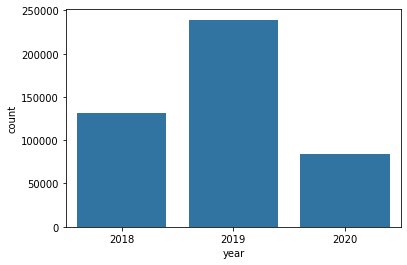

In [64]:
sb.countplot(data = df_final, x = 'year',color=base_color)

The first thing we notice is that April 2020 has much less the amount of ride in 2020, 2018 had a low frequency as well, but this could be interpreted as having less users as Lyft was still not widespread enough, we could also look at the total duration for how much total rides each year had.

([<matplotlib.axis.XTick at 0x1872f166848>,
 <a list of 3 Text xticklabel objects>)

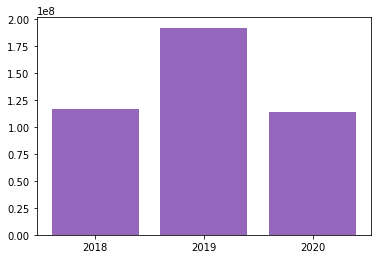

In [77]:
base_color = sb.color_palette()[4]
plt.bar(years, duration_per_year, align='center',color=base_color)
plt.xticks(list(years))

Similar to the previous chart, April 2020 has also seen a sharp decrease in the total duration of the rides, however this is obviously because there are less rides as seen in the previous charts, less rides means less time to time, but how did the average rides get affected? Is the median more or less, we will find out in the bivariate exploration.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!